In [34]:
import cv2 as cv
import numpy as np
import random
from edges import Edges
from background import Background
from PIL import Image, ImageOps

filename = "test.jpg"

class Sketch:
    def __init__(self, image):
        self.img = cv.imread(image)

    def sketch(self):
        grey = cv.cvtColor(self.img, cv.COLOR_BGR2GRAY)
        inv = 255 - grey
        blur = cv.GaussianBlur(inv, (13,13), 0)
        return cv.divide(grey, 255-blur, scale=256)

img = Image.open(filename)

sketch = Sketch(filename).sketch()
cv.imwrite("sketch.png", sketch)
bg = Background(img.size, octaves=6).background()
edges = Edges(filename).edges()
#sketchTrans = cv.cvtColor(sketch, cv.COLOR_GRAY2RGBA)

mask = edges[3]
sketch = cv.bitwise_and(sketch, edges, edges)
(thresh, sketch) = cv.threshold(sketch, 240, 255, cv.THRESH_BINARY)
#sketch = cv.multiply(sketch, np.array(bg), scale=(1./128))


h, w = sketch.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
#mask[1:h+1, 1:w+1] = sketch
sketchColor = cv.cvtColor(sketch, cv.COLOR_GRAY2RGBA)
white = np.all(sketchColor == [10,200,125,255], axis=-1)
sketchColor[white, -1] = 0
cv.imwrite("final.png", sketchColor)
final = Image.fromarray(sketchColor)
final.show()

<ipython-input-40-c9c566a67213>:2: RuntimeWarning: divide by zero encountered in true_divide
  result = (front * 255)/(255 - back)


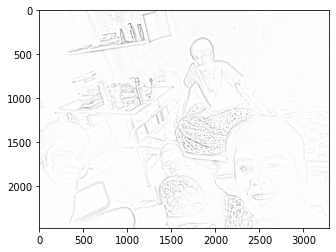

In [40]:
def dodge(front,back):
    result = (front * 255)/(255 - back) 
    result[result > 255] = 255
    result[back == 255] = 255
    return result.astype('uint8')

def grayscale(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

import imageio

s = imageio.imread("1.jpg")
g =grayscale(s)
i = 255-g

import scipy.ndimage
b = scipy.ndimage.filters.gaussian_filter(i,sigma=10)
r = dodge(b,g)

%matplotlib inline 
import matplotlib.pyplot as plt
plt.imshow(r, cmap="gray")

In [41]:
plt.imsave('img2.png', r, cmap='gray', vmin=0, vmax=255)